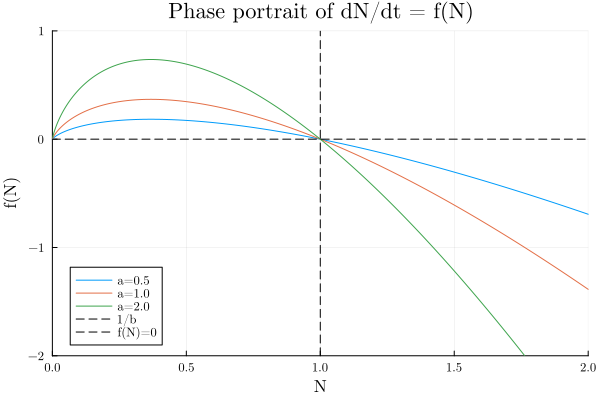

In [13]:
using Plots, DifferentialEquations

a = [0.5, 1.0, 2.0]
b = 1
f(N, i) = -a[i]*N*log(b*N)

# Plot f for different a values
N = 0:0.001:2
plot(xlabel="N", ylabel="f(N)", title="Phase portrait of dN/dt = f(N)", legend=:bottomleft, fontfamily="Computer Modern", lw=2, xlims=(0,2), ylims=(-2,1))
plot!(N, f.(N, 1), label="a=0.5")
plot!(N, f.(N, 2), label="a=1.0")
plot!(N, f.(N, 3), label="a=2.0")

vline!([1/b], label="1/b", linestyle=:dash, color=:black)
hline!([0], label="f(N)=0", linestyle=:dash, color=:black)


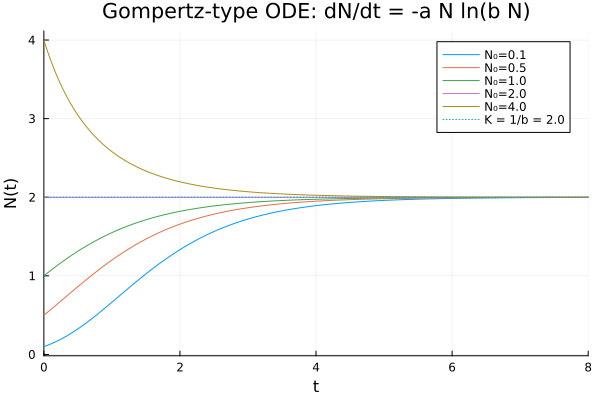

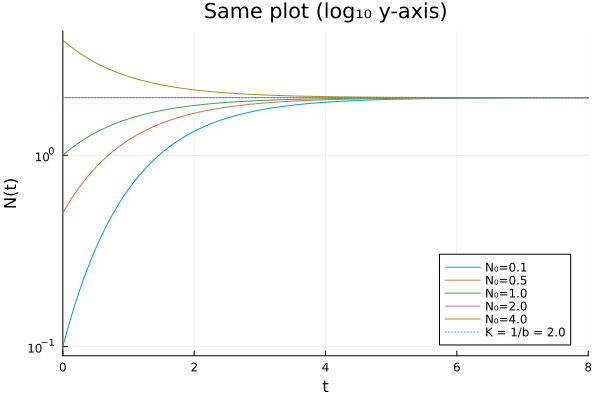

In [21]:
using DifferentialEquations, Plots

# --- Parameters (edit these) ---
a   = 1.0          # growth/decay rate (>0)
b   = 0.5          # so carrying capacity K = 1/b
tspan = (0.0, 8.0) # time window
ics = [0.1, 0.5, 1.0, 2.0, 4.0]  # initial conditions (must be > 0)

# --- Model ---
# dN/dt = -a*N*log(b*N)
f(N, p, t) = -p.a * N * log(p.b * N)  # out-of-place scalar ODE
p = (a = a, b = b)

# Analytic solution (valid for b>0, N0>0)
N_exact(t, N0; a=a, b=b) = (1/b) * exp(log(b*N0) * exp(-a*t))

# --- Solve numerically for each IC ---
sols = [solve(ODEProblem(f, N0, tspan, p), Tsit5();
              reltol=1e-9, abstol=1e-9)
        for N0 in ics]

# --- Prepare time grid for analytic overlays ---
tplot = range(tspan[1], tspan[2], length=600)

# --- Plot ---
plt = plot(xlabel="t", ylabel="N(t)", title="Gompertz-type ODE: dN/dt = -a N ln(b N)",
           legend=:topright, lw=2)

for (i, N0) in enumerate(ics)
    # numeric
    plot!(plt, sols[i], label="N₀=$(N0)")
    # analytic (dashed)
    # plot!(plt, tplot, [N_exact(t, N0; a=a, b=b) for t in tplot],
    #       label="analytic (N₀=$(N0))", linestyle=:dash)
end

# carrying capacity line K = 1/b
K = 1/b
hline!(plt, [K], label="K = 1/b = $(round(K, sigdigits=4))", linestyle=:dot)

display(plt)
savefig(plt, "gompertz_ode.png")

# --- Optional: log-y view to see early-time separation better ---
plt_log = plot(plt; yscale=:log10, title="Same plot (log₁₀ y-axis)", legend=:bottomright)
display(plt_log)
